## CarPrice Assignment

### Importing and Understanding Data

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import necessary libraries for data reading, manipulcation & visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Importing CarPrice_Assignment.csv
CarPrice = pd.read_csv('CarPrice_Assignment.csv')

In [4]:
#Check number of records & columns
CarPrice.shape

(205, 26)

In [5]:
#Create a company column from Carname & drop the CarName
CarPrice['company']= CarPrice.CarName.str.split(" ", n=1,expand=True)[0]
CarPrice.drop(columns=["CarName"], inplace=True, axis=0)

In [6]:
# Looking at the first five rows
CarPrice .head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [7]:
#check if rows are distinct or not. After splitting carname columns it may happen
CarPrice.duplicated().value_counts()
#no duplicate record found

False    205
dtype: int64

In [8]:
#Checking nulls values & type of values in columns
CarPrice.info() 
# No column has null value
# Only int,float & text columns are there.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg       

In [9]:
#Understand range of values in number type of fields
#Understand the difference berween and mean and median values of the numeric columns
CarPrice.describe()
#Mean and Median looks fine

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [10]:
# I think Density of car may have some relation with Price.
CarPrice['density'] = CarPrice.carlength*CarPrice.carwidth * CarPrice.carheight/CarPrice.curbweight

In [11]:
#Get list of All Categorical Variables
CatVar=[]
for c in CarPrice.columns:
    if CarPrice[c].dtype=="object":
        CatVar.append(c)
CatVar

['fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem',
 'company']

In [12]:
#Numerical Columns, Which should be scaled in coming steps for modelling
NumVar = [col for col in CarPrice.columns if col not in CatVar]
NumVar

['car_ID',
 'symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price',
 'density']

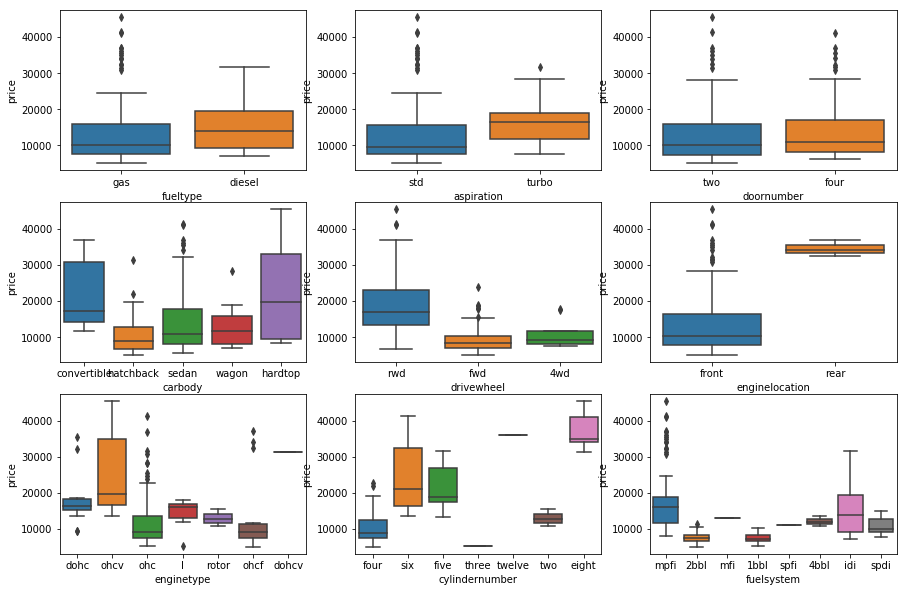

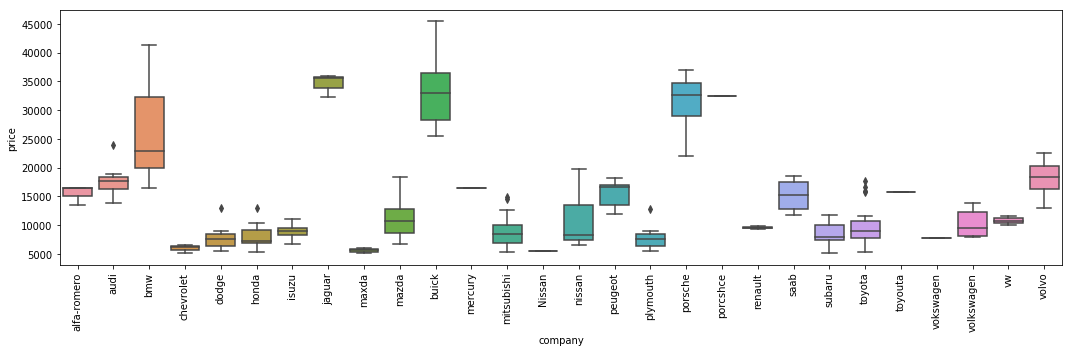

In [13]:
#Visualize the price distribution for categorical Variables
plt.figure(figsize=(15,10))
i=1
while i<=9: 
    plt.subplot(3,3,i)           
    ax= sns.boxplot(x=CarPrice[CatVar[i-1]], y="price", data=CarPrice)
    
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., 
        p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


    i+=1
    
plt.figure(figsize=(15,5))    
ax= sns.boxplot(x=CarPrice[CatVar[9]], y="price", data=CarPrice)
    
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., 
    p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

for item in ax.get_xticklabels():
    item.set_rotation(90)
plt.tight_layout()

#Every subplot is very interesting but prominent factor in almost all is they have outlier of price everywhere.

In [14]:
#Remove wrong carname from the dataframe. There 4 records
wrong_name= ['Nissan', 'porcshce', 'toyouta', 'vokswagen']
for wn in wrong_name:
    print( wn, ":", len(CarPrice[ (CarPrice.company == wn)]) )
    CarPrice = CarPrice[ ~(CarPrice.company == wn) ]

Nissan : 1
porcshce : 1
toyouta : 1
vokswagen : 1


In [15]:
print ( "Total %d companies' car are part of the dataframe" % ( len(CarPrice['company'].unique()) ) )

Total 24 companies' car are part of the dataframe


In [16]:
CarPrice.shape

(201, 27)

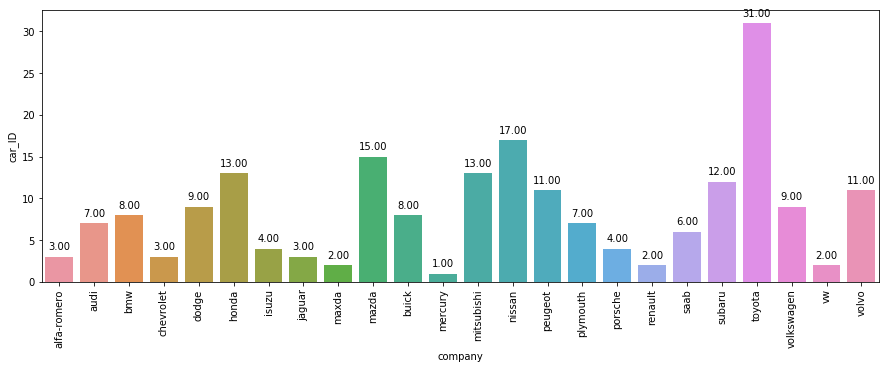

In [17]:
#Check number of cars for each company
fig=plt.figure(figsize=(15,5))

ax=sns.barplot(x= CarPrice.company, y=CarPrice['car_ID'],estimator=len)
for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., 
        p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
for item in ax.get_xticklabels():
    item.set_rotation(90)

In [18]:
# Will delete those dummy variable which has less then <=3 records

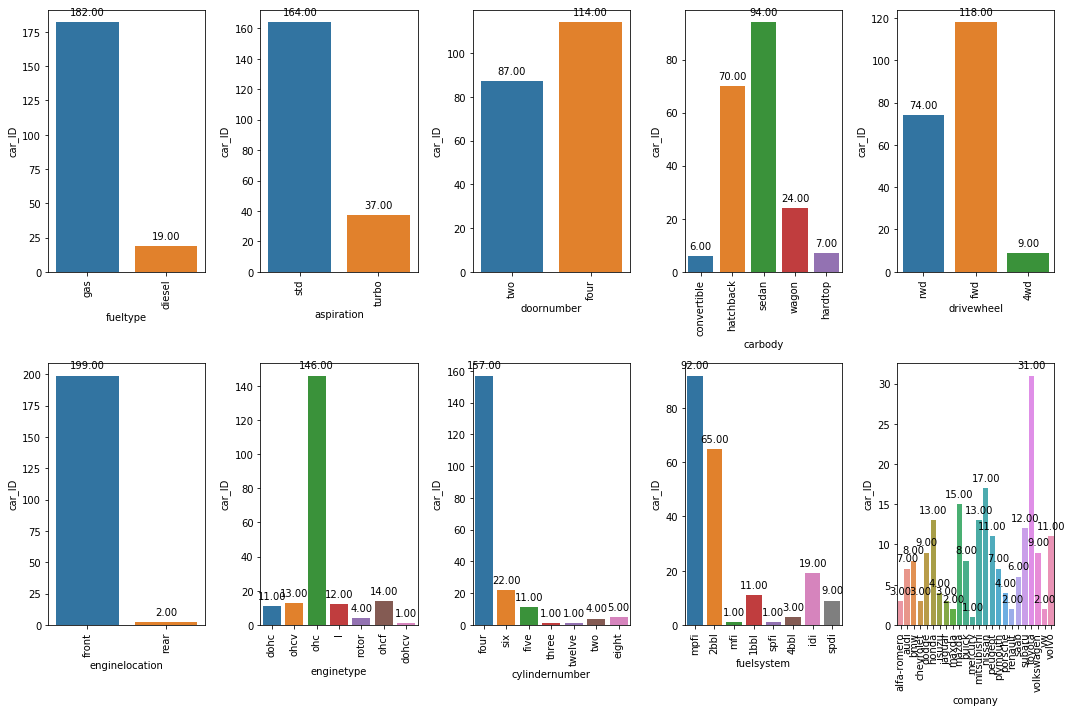

In [19]:
#Visualize the data distribution for categorical Variables
plt.figure(figsize=(15,10))
i=1
while i<=10: 
    plt.subplot(2,5,i)           
    ax= sns.barplot(CarPrice[CatVar[i-1]], CarPrice.car_ID, estimator=len, )
    
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., 
        p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    
    for item in ax.get_xticklabels():
        item.set_rotation(90)

    i+=1
plt.tight_layout()

In [20]:
# Will delete those dummy variable which has less then <=3 records

In [21]:
#Identify Factors for Each categorical variables
CatVar_Factors=[]
for v in CatVar:
    CatVar_Factors.append( [len(CarPrice[v].unique()), v] )
CatVar_Factors.sort()

CatVar_Factors = np.array(CatVar_Factors).T
CatVar_Factors= [np.array(CatVar_Factors[0], dtype=int), np.array(CatVar_Factors[1], dtype=str)]

#Categorical Variables which has 2 values
BinaryCatVariables= list(CatVar_Factors[1][CatVar_Factors[0]==2])
print ("Categorical Variables with 2 Values: " +str(BinaryCatVariables))

#Categorical Variables which has 2+ values
NonBinaryCatVariables= list(CatVar_Factors[1][CatVar_Factors[0]>2])
print ("Categorical Variables with 2+ Values: " +str(NonBinaryCatVariables))

Categorical Variables with 2 Values: ['aspiration', 'doornumber', 'enginelocation', 'fueltype']
Categorical Variables with 2+ Values: ['drivewheel', 'carbody', 'cylindernumber', 'enginetype', 'fuelsystem', 'company']


In [22]:
# Data in Categorical Variables which has 2 values
i=0
while i < len(BinaryCatVariables):
    print (BinaryCatVariables[i] + ":" + str(list(CarPrice[BinaryCatVariables[i]].unique())) )
    i+=1

aspiration:['std', 'turbo']
doornumber:['two', 'four']
enginelocation:['front', 'rear']
fueltype:['gas', 'diesel']


In [23]:
# Data in Categorical Variables which has 2+ values

i=0
while i < len(NonBinaryCatVariables):
    print (NonBinaryCatVariables[i] + ":" + str(list(CarPrice[NonBinaryCatVariables[i]].unique())) )
    i+=1

drivewheel:['rwd', 'fwd', '4wd']
carbody:['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop']
cylindernumber:['four', 'six', 'five', 'three', 'twelve', 'two', 'eight']
enginetype:['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv']
fuelsystem:['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi']
company:['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury', 'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab', 'subaru', 'toyota', 'volkswagen', 'vw', 'volvo']


## Data Preparation

In [24]:
# Numerical Treatment of Categorical Variables which has 2 Values

CarPrice[BinaryCatVariables[0]] = CarPrice[BinaryCatVariables[0]].apply( lambda x: 0 if x=="std" else 1)
CarPrice[BinaryCatVariables[1]] = CarPrice[BinaryCatVariables[1]].apply( lambda x: 0 if x=="two" else 1)
CarPrice[BinaryCatVariables[2]] = CarPrice[BinaryCatVariables[2]].apply( lambda x: 0 if x=="front" else 1)
CarPrice[BinaryCatVariables[3]] = CarPrice[BinaryCatVariables[3]].apply( lambda x: 0 if x=="gas" else 1)

In [25]:
# Check the CarPrice dataframe whether Treatment happened correctly
CarPrice[BinaryCatVariables].head(5)

,aspiration,doornumber,enginelocation,fueltype
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,1,0,0
4,0,1,0,0


##### Categorical Variables having 2+ categories. We need to convert these levels into integer using dummy variables concept

###### I am putting suffix in the dummy variables, so that they can be easily identified during modelling
##### DW_ : Drivewheel, CB_ : Carbody,  ET_ : EngineType, FS_: Fuelsystem, Com_: Company

In [26]:
drivewheel = pd.get_dummies(CarPrice[ NonBinaryCatVariables[0] ], drop_first = True)
drivewheel.columns = "DW_"+drivewheel.columns

carbody = pd.get_dummies(CarPrice[ NonBinaryCatVariables[1] ], drop_first = True)
carbody.columns = "CB_"+carbody.columns

#cylindernumber = pd.get_dummies(CarPrice[ NonBinaryCatVariables[2] ], drop_first = True)
#cylindernumber.columns = "CN_"+cylindernumber.columns

enginetype = pd.get_dummies(CarPrice[ NonBinaryCatVariables[3] ], drop_first = True)
enginetype.columns = "ET_"+enginetype.columns

fuelsystem= pd.get_dummies(CarPrice[ NonBinaryCatVariables[4] ], drop_first = True)
fuelsystem.columns = "FS_"+fuelsystem.columns

company= pd.get_dummies(CarPrice[ NonBinaryCatVariables[5] ], drop_first = True)
company.columns = "Com_"+company.columns

In [27]:
#convert cylindernumber into ordinal numbers
cn=['two','three','four','five','six', 'eight', 'twelve']
CarPrice['cylindernumber'] = CarPrice['cylindernumber'].apply( lambda x: cn.index(x))

#we need to scale this
NumVar.append("cylindernumber")

#This is like ordinal variable now
NonBinaryCatVariables.remove("cylindernumber")

In [28]:
# Concatenate all above dummy variable columns into main dataframe
CarPrice = pd.concat([CarPrice, drivewheel, carbody, enginetype, fuelsystem, company], axis = 1)

# Now let's see the head of our dataframe.
CarPrice.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,Com_peugeot,Com_plymouth,Com_porsche,Com_renault,Com_saab,Com_subaru,Com_toyota,Com_volkswagen,Com_volvo,Com_vw
0,1,3,0,0,0,convertible,rwd,0,88.6,168.8,...,0,0,0,0,0,0,0,0,0,0
1,2,3,0,0,0,convertible,rwd,0,88.6,168.8,...,0,0,0,0,0,0,0,0,0,0
2,3,1,0,0,0,hatchback,rwd,0,94.5,171.2,...,0,0,0,0,0,0,0,0,0,0
3,4,2,0,0,1,sedan,fwd,0,99.8,176.6,...,0,0,0,0,0,0,0,0,0,0
4,5,2,0,0,1,sedan,4wd,0,99.4,176.6,...,0,0,0,0,0,0,0,0,0,0


In [29]:
#Identify dummy features which has <=3 records
feature=[]
for f in CarPrice.columns:
    if CarPrice[f].dtype!="object" and f not in NumVar:
        rec= len( CarPrice[f][ CarPrice[f]==1] )
        if rec<=3:
            feature.append( [rec, f] )
feature.sort()
feature

[[1, 'Com_mercury'],
 [1, 'ET_dohcv'],
 [1, 'FS_mfi'],
 [1, 'FS_spfi'],
 [2, 'Com_maxda'],
 [2, 'Com_renault'],
 [2, 'Com_vw'],
 [2, 'enginelocation'],
 [3, 'Com_chevrolet'],
 [3, 'Com_jaguar'],
 [3, 'FS_4bbl']]

In [30]:
#After analysis of above features dropping following features from the dataframe

del_dummy_col=['Com_chevrolet', 'Com_jaguar', 'Com_maxda', 'Com_mercury', 'Com_renault', 'Com_vw',
'CN_twelve', 'CN_three','ET_dohcv','FS_spfi']

idx=[]
for i in CarPrice.columns:
    if i in del_dummy_col:
        idx.append(False)
    else:
        idx.append(True)
        
CarPrice = CarPrice[ CarPrice.columns[ idx] ]

In [31]:
#Non Binary Categorical Variables
NonBinaryCatVariables

['drivewheel', 'carbody', 'enginetype', 'fuelsystem', 'company']

In [32]:
# Drop Original NonBinaryCatVariables as we have created the dummies for it
CarPrice.drop(NonBinaryCatVariables , axis = 1, inplace = True)
# Drop car_ID as it is of no value for our model purpose
CarPrice.drop("car_ID", axis=1, inplace=True)

CarPrice.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,Com_mitsubishi,Com_nissan,Com_peugeot,Com_plymouth,Com_porsche,Com_saab,Com_subaru,Com_toyota,Com_volkswagen,Com_volvo
0,3,0,0,0,0,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,0,0,0
1,3,0,0,0,0,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,94.5,171.2,65.5,52.4,2823,...,0,0,0,0,0,0,0,0,0,0
3,2,0,0,1,0,99.8,176.6,66.2,54.3,2337,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,1,0,99.4,176.6,66.4,54.3,2824,...,0,0,0,0,0,0,0,0,0,0


In [33]:
CarPrice.describe().to_csv("CarPrice_DescribeData.csv")

In [34]:
#During above transformation Price column got lost in between many new columns
#Bringing PriceCol in First to visualize the correlation 
PriceCol = CarPrice.pop('price')
CarPrice = pd.concat( [pd.DataFrame(PriceCol,columns=["price"]) ,CarPrice], axis=1)

In [35]:
cor=CarPrice.corr()
#cor

In [36]:
#Identify those features which has correlation =1 with each other

high_cor_feature=[]
for c in cor.columns:
    if len(cor[ cor[c]==1 ])>1:
        high_cor_feature.append(c)
print (high_cor_feature)

['fueltype', 'FS_idi']


In [37]:
#remove fuletype.  fuletype & FS_idi has corr of 1
temp=CarPrice.pop("fueltype")

In [38]:
cor= cor[high_cor_feature]
#cor

In [39]:
#it is only one record in dataframe. Causing inf problem
CarPrice.drop(columns=["FS_mfi"], inplace=True )

#Causing inf in VIF because of corr of 1 in ET_l& Com_peugeot, FS_4bbl& ET_rotor
CarPrice.drop(columns=["ET_l", "ET_rotor"], inplace=True )

#Causing inf in VIF because of corr of ET_ohcf & Com_subaru= .90  &  Com_porsche & enginelocation = .81
CarPrice.drop(columns=["ET_ohcf", "Com_porsche"], inplace=True )

In [40]:
CarPrice.shape

(201, 49)

In [41]:
#Now check strong correlations (irrespective of sign) between Features and Price
#This is a list of 49 features who are having strong to weak relationship with Price
pd.DataFrame( {"Col":list( CarPrice.corr().index), "Corr1":list( abs( round(CarPrice.corr()['price'], 4)) ), 
       "Corr":list( round(CarPrice.corr()['price'],4)) } ).sort_values("Corr1", ascending=False)

,Col,Corr1,Corr
0,price,1.0000,1.0000
11,enginesize,0.8729,0.8729
9,curbweight,0.8433,0.8433
15,horsepower,0.8028,0.8028
7,carwidth,0.7750,0.7750
10,cylindernumber,0.7240,0.7240
18,highwaympg,0.6997,-0.6997
6,carlength,0.6981,0.6981
19,density,0.6959,-0.6959
17,citympg,0.6823,-0.6823


## Splitting the Data into Training and Testing Sets

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [43]:
# I am splitting CarPrice dataframe in 70/30.
df_train, df_test = train_test_split(CarPrice, train_size = 0.70, test_size = 0.30, random_state=1)

### Rescaling the Features in Train Data

We will use MinMax scaling.

In [44]:
df_train.head(5)

,price,symboling,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,Com_mazda,Com_mitsubishi,Com_nissan,Com_peugeot,Com_plymouth,Com_saab,Com_subaru,Com_toyota,Com_volkswagen,Com_volvo
69,28176.0,0,1,0,0,106.7,187.5,70.3,54.9,3495,...,0,0,0,0,0,0,0,0,0,0
91,6649.0,1,0,0,0,94.5,165.3,63.8,54.5,1918,...,0,0,1,0,0,0,0,0,0,0
152,6488.0,1,0,1,0,95.7,158.7,63.6,54.5,2015,...,0,0,0,0,0,0,0,1,0,0
42,10345.0,1,0,0,0,96.5,169.1,66.0,51.0,2293,...,0,0,0,0,0,0,0,0,0,0
17,36880.0,0,0,1,0,110.0,197.0,70.9,56.3,3505,...,0,0,0,0,0,0,0,0,0,0


In [45]:
scaler = MinMaxScaler()

In [46]:
#All Numerical Features in this variables
NumVar

#Remove car_D numberical features create a new variable 
#which will have have all numerical features of the dataset which we want to scale
var_to_scale= NumVar.copy()
var_to_scale.remove("car_ID")

In [47]:
df_train.describe()

,price,symboling,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,Com_mazda,Com_mitsubishi,Com_nissan,Com_peugeot,Com_plymouth,Com_saab,Com_subaru,Com_toyota,Com_volkswagen,Com_volvo
count,140.00000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,...,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,13407.91905,0.842857,0.192857,0.592857,0.014286,98.724286,174.470714,65.993571,53.663571,2573.792857,...,0.078571,0.078571,0.078571,0.057143,0.035714,0.035714,0.064286,0.150000,0.035714,0.050000
std,7929.26599,1.230730,0.395959,0.493066,0.119092,5.825902,11.869655,2.160576,2.500193,515.570544,...,0.270035,0.270035,0.270035,0.232949,0.186243,0.186243,0.246142,0.358354,0.186243,0.218728
min,5118.00000,-2.000000,0.000000,0.000000,0.000000,86.600000,144.600000,61.800000,47.800000,1713.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7784.75000,0.000000,0.000000,0.000000,0.000000,94.500000,167.300000,64.100000,51.600000,2184.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,10846.50000,1.000000,0.000000,1.000000,0.000000,96.750000,173.000000,65.500000,54.100000,2417.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,16576.00000,2.000000,0.000000,1.000000,0.000000,101.400000,183.775000,66.900000,55.500000,2959.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,45400.00000,3.000000,1.000000,1.000000,1.000000,115.600000,202.600000,72.000000,59.100000,4066.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [48]:
# scale the train dataframe
# Apply scaler() to all the numerical columns except the 'yes-no' and 'dummy' variables
df_train[var_to_scale] = scaler.fit_transform(df_train[var_to_scale])

df_train.head()
# Train & Test 2 separate dataframe are ready for model building and testing

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,price,symboling,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,Com_mazda,Com_mitsubishi,Com_nissan,Com_peugeot,Com_plymouth,Com_saab,Com_subaru,Com_toyota,Com_volkswagen,Com_volvo
69,0.572414,0.4,1,0,0,0.693103,0.739655,0.833333,0.628319,0.757331,...,0,0,0,0,0,0,0,0,0,0
91,0.038007,0.6,0,0,0,0.272414,0.356897,0.196078,0.592920,0.087123,...,0,0,1,0,0,0,0,0,0,0
152,0.034010,0.6,0,1,0,0.313793,0.243103,0.176471,0.592920,0.128347,...,0,0,0,0,0,0,0,1,0,0
42,0.129760,0.6,0,0,0,0.341379,0.422414,0.411765,0.283186,0.246494,...,0,0,0,0,0,0,0,0,0,0
17,0.788491,0.4,0,1,0,0.806897,0.903448,0.892157,0.752212,0.761581,...,0,0,0,0,0,0,0,0,0,0


In [49]:
df_train.describe().to_csv("df_train_describe.csv")

### Dividing into X and Y sets for the model building

In [50]:
y_train=df_train.pop("price")
X_train=df_train

## Building Model

In [51]:
# Importing RFE for Selecting Features
from sklearn.feature_selection import RFE

# Importing LinearRegression for creating model
from sklearn.linear_model import LinearRegression

# Importing statsmodels for creating model
import statsmodels.api as sm

# Import variance_inflation_factor To calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Import r2_score to get r square score
from sklearn.metrics import r2_score

### Running RFE & Creating Model

In [52]:
#This function builds model, prints error summary, return features selected by RFE and prints summary of regression
#This all is done depends what parameter is passed to this function

#Parameters of this function
#X_Data it may be X_train or X_Test.
#number_of_rfe_features means how many features you want RFE to select for you
#predict=True mean return the model and print error terms graph. 
#predict=False means return the columns selected by REF &  model. It also print the linearRegression summary
#train=True mean fit the model. train=False mean donot fit the model. 
#when Train= true then X_Data should be X_train dataframe

def buildModel(X_data, y_data, number_of_rfe_features, predict=False, train=True, rsquare_train=False):

    if train:
        #Initiate LinearRegression Model Object
        lm = LinearRegression()

        #Fit Model on Train Data
        lm.fit(X_data, y_data)

        #Identify top n features from the dataframe
        rfe = RFE(lm, number_of_rfe_features)             
        rfe = rfe.fit(X_data, y_data)

        #Name of those top n features
        col = X_data.columns[rfe.support_]

        # Creating X_train dataframe with RFE selected variables
        X_train_rfe = X_data[col]

        # Adding a constant variable, because statsmodel.ols 
        #does not have intercept by default and line go through 0,0
        X_train_rfe = sm.add_constant(X_train_rfe)
        
        # Running the linear model
        lm = sm.OLS(y_data,X_train_rfe).fit()
        
        if rsquare_train:
            return r2_score(y_data,lm.predict(X_train_rfe))

    if predict:
        fig = plt.figure(figsize=(15,5))
        
        # Plot heading 
        fig.suptitle('Error Terms', fontsize = 20)  
        plt.subplot(1,2,1)
        #predict the price
        y_train_predict = lm.predict(X_train_rfe)
        
        # Plot the histogram of the error terms
        sns.distplot((y_data - y_train_predict), bins = 20)
        
        # X-label
        plt.xlabel('Errors', fontsize = 18)
        
        # Plot the scattered of the error terms
        plt.subplot(1,2,2)
        sns.scatterplot(y=(y_data - y_train_predict), x=y_train_predict)
        # X-label
        plt.ylabel('Errors', fontsize = 18)
        plt.xlabel("y prediction", fontsize = 18)
        return lm
        
    else:
        #Let's see the summary of our linear model
        print(lm.summary())
        return col, lm

In [53]:
#To avoid these steps again and again. To keep my notebook clean I am putting this in function
#It will give me VIG for X_train_new (this dataframe will keep chaning from one iteration of model to other)
def getVIF():
    vif = pd.DataFrame()
    X = X_train_new
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print (vif)
    return vif

In [54]:
#During model building This function helps in identifying column which should be dropped based on VIF or p-value

#If pvalue_based is True then it will give name of feature which has highest p value
#else it will give name of feature which has higest VIF

def getfeatureName_toDrop(pvalue_based):
    if pvalue_based:
        nm=list(lm.pvalues.sort_values(ascending=False).head(1).index)[0]
        if nm=="const":
            nm=list(lm.pvalues.sort_values(ascending=False).head(2).index)[1]
        return nm
    else:
        return list(vif.Features.head(1))[0]

## Model Building and Feature Elimination Process Starts Here

In [55]:
# During model building exercise several times X_train will change and I donot want to waste time 
# to do the earlier steps again and again to build the X_train. Therefore for model building 
# I will use X_train_new and at any point of time if I have to start rebuilding the model 
# I will start again from here and will not go back then this point. Therefore creaing copy of X_train

X_train_new = X_train.copy()

In [56]:
X_train_new.shape

(140, 48)

#### Build Model 1st Iteration

In [57]:
#All feature Selected First Time
n=len(X_train.columns)
col,lm=buildModel(X_train_new, y_train, number_of_rfe_features=n,predict=False,train=True,rsquare_train=False)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     66.26
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           8.58e-54
Time:                        18:56:08   Log-Likelihood:                 280.15
No. Observations:                 140   AIC:                            -462.3
Df Residuals:                      91   BIC:                            -318.1
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2244      0.165  

In [58]:
#Adjusted R square is 97% but features in the model are 47

In [59]:
vif=getVIF()

            Features     VIF
8         curbweight  556.49
18           density  522.49
5          carlength  264.56
13  compressionratio  260.40
9     cylindernumber  238.67
17        highwaympg  215.17
29            FS_idi  207.41
16           citympg  201.88
10        enginesize  151.00
7          carheight  110.72
11         boreratio  110.13
14        horsepower  107.39
4          wheelbase   81.46
6           carwidth   78.32
12            stroke   66.20
30           FS_mpfi   46.66
23          CB_sedan   37.10
25            ET_ohc   32.66
0          symboling   32.58
27           FS_2bbl   28.48
19            DW_fwd   27.73
15           peakrpm   27.32
20            DW_rwd   26.19
22      CB_hatchback   20.41
2         doornumber   11.46
1         aspiration   11.18
24          CB_wagon   10.78
44        Com_subaru    9.99
31           FS_spdi    8.20
41       Com_peugeot    7.88
26           ET_ohcv    6.38
34         Com_buick    5.70
28           FS_4bbl    5.51
39    Com_mits

#### Build Model 2nd Iteration

In [60]:
#Select 15 Top Ranking Features of this dataset & print Regression Results
n=15
col,lm=buildModel(X_train_new, y_train, number_of_rfe_features=n,predict=False,train=True)
#reset the dataframe using those feature
X_train_new=X_train_new[col]

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     115.4
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           3.25e-65
Time:                        18:56:08   Log-Likelihood:                 218.76
No. Observations:                 140   AIC:                            -405.5
Df Residuals:                     124   BIC:                            -358.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0727      0.124      0.

In [61]:
# With Just 15 features adj r square is 93%, only 4 % drop while we had dropped 35 variables

In [62]:
vif=getVIF()

          Features     VIF
5       curbweight  169.71
11      highwaympg  145.30
12         density  127.86
10         citympg  111.29
2        carlength  103.70
6   cylindernumber   70.82
7       enginesize   42.84
1        wheelbase   41.88
3         carwidth   35.61
4        carheight   28.16
8        boreratio   27.67
9           stroke   17.64
14     Com_peugeot    1.75
0   enginelocation    1.51
13         Com_bmw    1.36


#### Build Model 3rd Iteration

In [63]:
dropFeature = getfeatureName_toDrop(True)
print ("Dropping Feature:" +dropFeature)
X_train_new.drop(columns=dropFeature, inplace=True, axis=0)
n-=1
col,lm=buildModel(X_train_new, y_train, number_of_rfe_features=n,predict=False,train=True)  

Dropping Feature:highwaympg
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     124.2
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           3.53e-66
Time:                        18:56:09   Log-Likelihood:                 218.52
No. Observations:                 140   AIC:                            -407.0
Df Residuals:                     125   BIC:                            -362.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           

In [64]:
vif=getVIF()

          Features     VIF
5       curbweight  169.50
11         density  127.33
2        carlength  102.62
6   cylindernumber   68.10
1        wheelbase   40.62
7       enginesize   40.41
3         carwidth   35.56
4        carheight   27.74
8        boreratio   25.88
10         citympg   17.00
9           stroke   15.58
13     Com_peugeot    1.75
0   enginelocation    1.49
12         Com_bmw    1.33


#### Build Model 4th Iteration

In [65]:
dropFeature = getfeatureName_toDrop(True)
print ("Dropping Feature:" +dropFeature)
X_train_new.drop(columns=dropFeature, inplace=True, axis=0)
n-=1
col,lm=buildModel(X_train_new, y_train, number_of_rfe_features=n,predict=False,train=True)

Dropping Feature:carheight
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     132.8
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           7.17e-67
Time:                        18:56:09   Log-Likelihood:                 217.53
No. Observations:                 140   AIC:                            -407.1
Df Residuals:                     126   BIC:                            -365.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            

In [66]:
vif=getVIF()

          Features     VIF
4       curbweight  102.79
2        carlength   98.62
10         density   72.73
5   cylindernumber   58.73
6       enginesize   40.31
1        wheelbase   36.03
3         carwidth   28.54
7        boreratio   21.82
9          citympg   16.27
8           stroke   12.60
12     Com_peugeot    1.75
0   enginelocation    1.40
11         Com_bmw    1.31


#### Build Model 5th Iteration

In [67]:
dropFeature = getfeatureName_toDrop(True)
print ("Dropping Feature:" +dropFeature)
X_train_new.drop(columns=dropFeature, inplace=True, axis=0)
n-=1
col,lm=buildModel(X_train_new, y_train, number_of_rfe_features=n,predict=False,train=True)

Dropping Feature:density
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     142.9
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.35e-67
Time:                        18:56:09   Log-Likelihood:                 216.60
No. Observations:                 140   AIC:                            -407.2
Df Residuals:                     127   BIC:                            -369.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              

In [68]:
vif=getVIF()

          Features    VIF
2        carlength  64.51
4       curbweight  44.45
1        wheelbase  34.69
5   cylindernumber  33.55
6       enginesize  28.63
3         carwidth  27.54
7        boreratio  16.64
8           stroke  11.05
9          citympg  10.90
11     Com_peugeot   1.74
0   enginelocation   1.40
10         Com_bmw   1.30


#### Build Model 6th Iteration

In [69]:
dropFeature = getfeatureName_toDrop(True)
print ("Dropping Feature:" +dropFeature)
X_train_new.drop(columns=dropFeature, inplace=True, axis=0)
n-=1
col,lm=buildModel(X_train_new, y_train, number_of_rfe_features=n,predict=False,train=True)

Dropping Feature:citympg
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     155.7
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.82e-68
Time:                        18:56:09   Log-Likelihood:                 216.00
No. Observations:                 140   AIC:                            -408.0
Df Residuals:                     128   BIC:                            -372.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              

In [70]:
vif=getVIF()

          Features    VIF
2        carlength  61.31
4       curbweight  38.81
1        wheelbase  31.87
3         carwidth  27.20
6       enginesize  23.38
5   cylindernumber  17.74
7        boreratio  11.68
8           stroke   7.89
10     Com_peugeot   1.69
0   enginelocation   1.36
9          Com_bmw   1.22


#### Build Model 7th Iteration

In [71]:
dropFeature = getfeatureName_toDrop(True)
print ("Dropping Feature:" +dropFeature)
X_train_new.drop(columns=dropFeature, inplace=True, axis=0)
n-=1
col,lm=buildModel(X_train_new, y_train, number_of_rfe_features=n,predict=False,train=True)

Dropping Feature:wheelbase
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     167.5
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           7.95e-69
Time:                        18:56:09   Log-Likelihood:                 214.06
No. Observations:                 140   AIC:                            -406.1
Df Residuals:                     129   BIC:                            -373.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            

In [72]:
vif=getVIF()

         Features    VIF
1       carlength  47.71
3      curbweight  38.80
2        carwidth  24.32
5      enginesize  23.29
4  cylindernumber  17.71
6       boreratio  11.68
7          stroke   7.84
9     Com_peugeot   1.43
0  enginelocation   1.27
8         Com_bmw   1.18


#### Build Model 8th Iteration

In [73]:
dropFeature = getfeatureName_toDrop(False)
print ("Dropping Feature:" +dropFeature)
X_train_new.drop(columns=dropFeature, inplace=True, axis=0)
n-=1
col,lm=buildModel(X_train_new, y_train, number_of_rfe_features=n,predict=False,train=True)

Dropping Feature:carlength
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     181.0
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           4.72e-69
Time:                        18:56:09   Log-Likelihood:                 211.76
No. Observations:                 140   AIC:                            -403.5
Df Residuals:                     130   BIC:                            -374.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            

In [74]:
vif=getVIF()

         Features    VIF
2      curbweight  30.23
4      enginesize  19.97
1        carwidth  19.20
3  cylindernumber  16.16
5       boreratio   8.66
6          stroke   7.46
8     Com_peugeot   1.43
0  enginelocation   1.25
7         Com_bmw   1.16


#### Build Model 9th Iteration

In [75]:
dropFeature = getfeatureName_toDrop(False)
print ("Dropping Feature:" +dropFeature)
X_train_new.drop(columns=dropFeature, inplace=True, axis=0)
n-=1
col,lm=buildModel(X_train_new, y_train, number_of_rfe_features=n,predict=False,train=True)

Dropping Feature:curbweight
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     168.3
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           4.66e-65
Time:                        18:56:09   Log-Likelihood:                 199.00
No. Observations:                 140   AIC:                            -380.0
Df Residuals:                     131   BIC:                            -353.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           

In [76]:
vif=getVIF()

         Features    VIF
2  cylindernumber  15.94
1        carwidth  14.13
3      enginesize  12.21
4       boreratio   8.10
5          stroke   7.45
7     Com_peugeot   1.28
0  enginelocation   1.24
6         Com_bmw   1.15


#### Build Model 10th Iteration

In [77]:
dropFeature = getfeatureName_toDrop(False)
print ("Dropping Feature:" +dropFeature)
X_train_new.drop(columns=dropFeature, inplace=True, axis=0)
n-=1
col,lm=buildModel(X_train_new, y_train, number_of_rfe_features=n,predict=False,train=True)

Dropping Feature:cylindernumber
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     157.9
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           6.13e-61
Time:                        18:56:09   Log-Likelihood:                 186.06
No. Observations:                 140   AIC:                            -356.1
Df Residuals:                     132   BIC:                            -332.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const       

In [78]:
vif=getVIF()

         Features    VIF
1        carwidth  14.01
2      enginesize   8.12
3       boreratio   8.04
4          stroke   5.31
0  enginelocation   1.21
6     Com_peugeot   1.18
5         Com_bmw   1.12


#### Build Model 11th Iteration

In [79]:
dropFeature =  getfeatureName_toDrop(True)
print ("Dropping Feature:" +dropFeature)
X_train_new.drop(columns=dropFeature, inplace=True, axis=0)
n-=1
col,lm=buildModel(X_train_new, y_train, number_of_rfe_features=n,predict=False,train=True)

Dropping Feature:boreratio
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     184.6
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           5.90e-62
Time:                        18:56:09   Log-Likelihood:                 185.72
No. Observations:                 140   AIC:                            -357.4
Df Residuals:                     133   BIC:                            -336.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            

In [80]:
vif=getVIF()

         Features    VIF
1        carwidth  11.84
2      enginesize   7.97
3          stroke   4.67
5     Com_peugeot   1.17
0  enginelocation   1.15
4         Com_bmw   1.12


##### Build Model 12th Iteration

In [81]:
dropFeature =  getfeatureName_toDrop(True)
print ("Dropping Feature:" +dropFeature)
X_train_new.drop(columns=dropFeature, inplace=True, axis=0)
n-=1
col,lm=buildModel(X_train_new, y_train, number_of_rfe_features=n,predict=False,train=True)

Dropping Feature:stroke
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     219.7
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           9.66e-63
Time:                        18:56:09   Log-Likelihood:                 184.73
No. Observations:                 140   AIC:                            -357.5
Df Residuals:                     134   BIC:                            -339.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0

In [82]:
vif=getVIF()

         Features   VIF
2      enginesize  7.96
1        carwidth  7.78
4     Com_peugeot  1.16
0  enginelocation  1.15
3         Com_bmw  1.12


### Model 1

In [83]:
dropFeature = getfeatureName_toDrop(True)
print ("Dropping Feature:" +dropFeature)
X_train_new.drop(columns=dropFeature, inplace=True, axis=0)
n-=1
col,lm=buildModel(X_train_new, y_train, number_of_rfe_features=n,predict=False,train=True)

Dropping Feature:Com_peugeot
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     265.2
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           6.98e-63
Time:                        18:56:09   Log-Likelihood:                 182.08
No. Observations:                 140   AIC:                            -354.2
Df Residuals:                     135   BIC:                            -339.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          

In [84]:
vif=getVIF()

         Features   VIF
2      enginesize  7.74
1        carwidth  7.15
0  enginelocation  1.15
3         Com_bmw  1.12


In [85]:
#This is the First model
#Which is giving adjusted r2 of 88.4%
#But the prbolem is high multicolinearity of enginsize and carwidth
#Temporary saving this model and dataset because it will get modified in next iteration.
#I need this info to restore everything to this level.
lm1 = lm
old_n = n #Number of features
old_col = col #name of features
X_train_temp = X_train_new.copy()

### Model 2

In [86]:
X_train_new.corr()

,enginelocation,carwidth,enginesize,Com_bmw
enginelocation,1.000000,-0.055560,0.191864,-0.023168
carwidth,-0.055560,1.000000,0.726822,0.039908
enginesize,0.191864,0.726822,1.000000,0.198337
Com_bmw,-0.023168,0.039908,0.198337,1.000000


In [87]:
dropFeature = "carwidth" #getfeatureName_toDrop(False)
print ("Dropping Feature:" +dropFeature)
X_train_new.drop(columns=dropFeature, inplace=True, axis=0)
n-=1
col,lm=buildModel(X_train_new, y_train, number_of_rfe_features=n,predict=False,train=True)

Dropping Feature:carwidth
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     208.3
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.20e-50
Time:                        18:56:09   Log-Likelihood:                 149.93
No. Observations:                 140   AIC:                            -291.9
Df Residuals:                     136   BIC:                            -280.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             

In [88]:
vif=getVIF()

         Features   VIF
1      enginesize  1.13
2         Com_bmw  1.08
0  enginelocation  1.05


In [89]:
#This is the Second model
#Which is giving adjusted r2 of 81.7%. A significant drop with respect to the first model.
#It does not have any multicolearity problem
lm

### Hereafter I will use model1 for the prediction and score calculations

In [90]:
#Restoring Dataset, feature_count & Model
X_train_new = X_train_temp
lm=lm1
n=old_n
col=old_col

### Residual Analysis of the train data
So, now to check if the error terms are also normally distributed (This is one of the assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

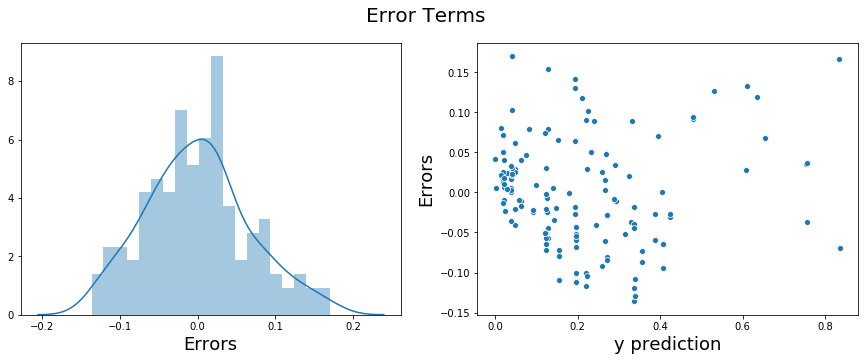

In [91]:
lm=buildModel(X_train_new, y_train, number_of_rfe_features=n,predict=True,train=True)
#Errors are normally distributed equally around 0. It is little right tailed.
#Erros are white noise.
#Errors terms have homoscedastisity

## Making Predictions

#### Applying the scaling on the test sets

In [92]:
df_test[var_to_scale] = scaler.transform(df_test[var_to_scale])
df_test_new=df_test.copy()

#### Dividing into X_test and y_test

In [93]:
y_test = df_test_new.pop('price')
X_test = df_test_new

In [94]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)



In [95]:
# Making predictions
y_pred = lm.predict(X_test_new)

## Model Evaluation

Text(0, 0.5, 'y_pred')

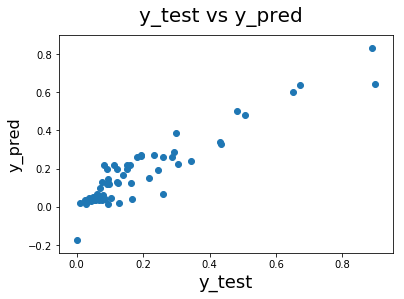

In [96]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

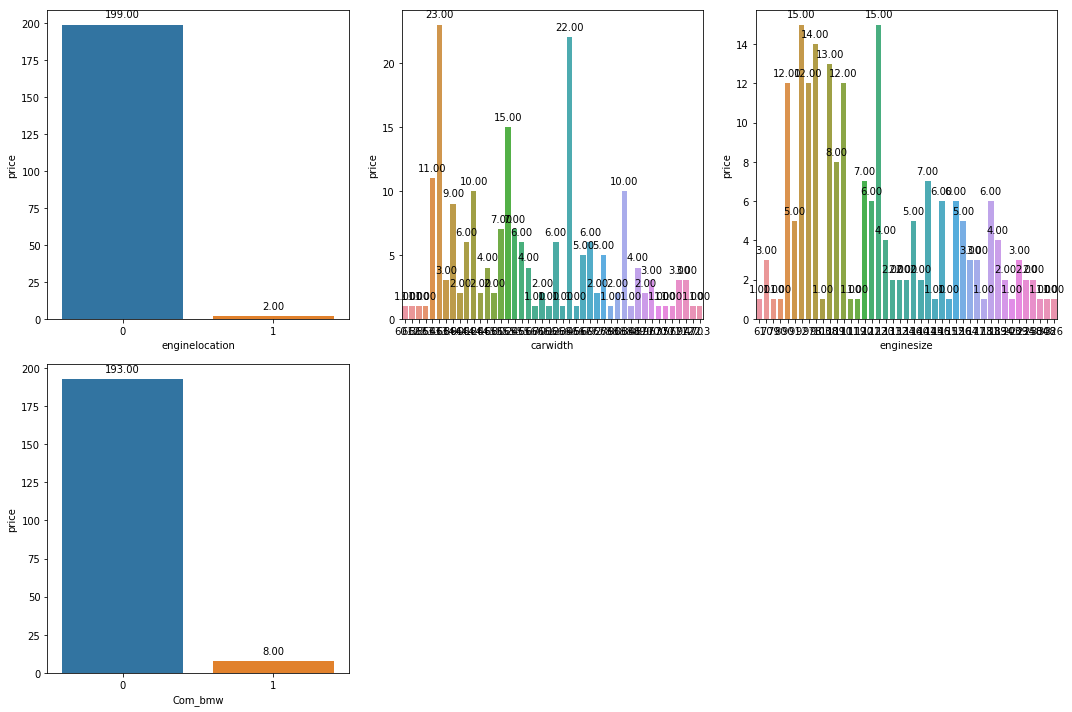

In [97]:
#Visualize the data distribution for the variables selected for the model
#If some variable has too much data imbalance and by removing that r2 is not compromised signifantly 
#then we can go back & remove the variable from the model and refine the model

plt.figure(figsize=(15,10))
i=1
while i<=len(col): 
    plt.subplot(2,3,i)           
    ax= sns.barplot(CarPrice[col[i-1]], CarPrice.price, estimator=len, )
    
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., 
        p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


    i+=1
plt.tight_layout()

In [98]:
#Features Selected of the Model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     265.2
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           6.98e-63
Time:                        18:56:13   Log-Likelihood:                 182.08
No. Observations:                 140   AIC:                            -354.2
Df Residuals:                     135   BIC:                            -339.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0994      0.013     -7.936      0.000      -0.124      -0.075
enginelocation     0.4398      0.051      8.587      0.000       0.339       0.541
carwidth           0.3688      0.042      8.871      0.000       0.287       0.451
enginesize         0.6168      0.057     10.890      0.000       0.505       0.729
Com_bmw            0.1880      0.032      5.917      0.000       0.125       0.251
==============================================================================
Omnibus:                        1.855   Durbin-Watson:                   1.894
Prob(Omnibus):                  0.396   Jarque-Bera (JB):                1.893
Skew:                           0.268   Prob(JB):                        0.388
Kurtosis:                       2.808   Cond. No.                         14.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###### price =  -0.0994 + 0.4398*enginelocation +  0.3688*carwidth  + 0.6168*enginesize	     + 	0.1880*Com_bmw
###### This is the file multi linear regression

In [99]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     265.2
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           6.98e-63
Time:                        18:56:13   Log-Likelihood:                 182.08
No. Observations:                 140   AIC:                            -354.2
Df Residuals:                     135   BIC:                            -339.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0994      0.013     -7.936      0.000      -0.124      -0.075
enginelocation     0.4398      0.051      8.587      0.000       0.339       0.541
carwidth           0.3688      0.042      8.871      0.000       0.287       0.451
enginesize         0.6168      0.057     10.890      0.000       0.505       0.729
Com_bmw            0.1880      0.032      5.917      0.000       0.125       0.251
==============================================================================
Omnibus:                        1.855   Durbin-Watson:                   1.894
Prob(Omnibus):                  0.396   Jarque-Bera (JB):                1.893
Skew:                           0.268   Prob(JB):                        0.388
Kurtosis:                       2.808   Cond. No.                         14.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [100]:
col

Index(['enginelocation', 'carwidth', 'enginesize', 'Com_bmw'], dtype='object')

In [101]:
col1=list(col)
n=len(col1)
train_r2_score=[]
test_r2_score=[]

In [102]:
def RunFinalModel(n):
    i=0
    while i<=n:

        # Splitting CarPrice dataframe in 70/30.
        df_train1, df_test1 = train_test_split(CarPrice, train_size = 0.70, test_size = 0.30, random_state=i)
        
        # scale the train dataframe
        # Apply scaler() to all the numerical columns except the 'yes-no' and 'dummy' variables
        scaler = MinMaxScaler()
        df_train1[var_to_scale] = scaler.fit_transform(df_train1[var_to_scale])

        y_train1=df_train1.pop("price")
        X_train1=df_train1[col1]

        #Train the model with selected feature
        col,lm1=buildModel( X_train1, y_train1, number_of_rfe_features=n,predict=False,train=True)
        
        #Append the r2 score in list
        train_r2_score.append ( buildModel(X_train1, y_train1, number_of_rfe_features=n,predict=True,train=True, rsquare_train=True))
        
        
        #Transform Test Data
        df_test1[var_to_scale] = scaler.transform(df_test1[var_to_scale])
        y_test1 = df_test1.pop('price')
        X_test1 = df_test1

        # Creating X_test1 dataframe by dropping variables from X_test1
        X_test1 = X_test1[X_train1.columns]

        # Adding a constant variable 
        X_test1 = sm.add_constant(X_test1)
        # Making predictions
        y_pred1 = lm.predict(X_test1)
        test_r2_score.append ( r2_score(y_test1, y_pred1))
        
        i+=1


In [103]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     265.2
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           6.98e-63
Time:                        18:56:13   Log-Likelihood:                 182.08
No. Observations:                 140   AIC:                            -354.2
Df Residuals:                     135   BIC:                            -339.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0994      0.013     -7.936      0.000      -0.124      -0.075
enginelocation     0.4398      0.051      8.587      0.000       0.339       0.541
carwidth           0.3688      0.042      8.871      0.000       0.287       0.451
enginesize         0.6168      0.057     10.890      0.000       0.505       0.729
Com_bmw            0.1880      0.032      5.917      0.000       0.125       0.251
==============================================================================
Omnibus:                        1.855   Durbin-Watson:                   1.894
Prob(Omnibus):                  0.396   Jarque-Bera (JB):                1.893
Skew:                           0.268   Prob(JB):                        0.388
Kurtosis:                       2.808   Cond. No.                         14.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [104]:
#Run the model 10 times with different set of random_state
RunFinalModel(10)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     283.9
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.17e-64
Time:                        18:56:15   Log-Likelihood:                 171.39
No. Observations:                 140   AIC:                            -332.8
Df Residuals:                     135   BIC:                            -318.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1222      0.013     -9.

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     265.2
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           6.98e-63
Time:                        18:56:17   Log-Likelihood:                 182.08
No. Observations:                 140   AIC:                            -354.2
Df Residuals:                     135   BIC:                            -339.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0994      0.013     -7.

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     288.6
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           4.36e-65
Time:                        18:56:20   Log-Likelihood:                 179.35
No. Observations:                 140   AIC:                            -348.7
Df Residuals:                     135   BIC:                            -334.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1721      0.016    -10.

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     247.1
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           4.63e-61
Time:                        18:56:22   Log-Likelihood:                 178.19
No. Observations:                 140   AIC:                            -346.4
Df Residuals:                     135   BIC:                            -331.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1805      0.017    -10.

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     284.1
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.11e-64
Time:                        18:56:25   Log-Likelihood:                 185.03
No. Observations:                 140   AIC:                            -360.1
Df Residuals:                     135   BIC:                            -345.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0993      0.012     -8.

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     243.4
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.15e-60
Time:                        18:56:27   Log-Likelihood:                 173.17
No. Observations:                 140   AIC:                            -336.3
Df Residuals:                     135   BIC:                            -321.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1884      0.019    -10.

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     280.8
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           2.25e-64
Time:                        18:56:30   Log-Likelihood:                 181.43
No. Observations:                 140   AIC:                            -352.9
Df Residuals:                     135   BIC:                            -338.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1106      0.013     -8.

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     293.5
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.56e-65
Time:                        18:56:32   Log-Likelihood:                 167.64
No. Observations:                 140   AIC:                            -325.3
Df Residuals:                     135   BIC:                            -310.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1154      0.014     -8.

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     286.4
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           6.88e-65
Time:                        18:56:35   Log-Likelihood:                 179.28
No. Observations:                 140   AIC:                            -348.6
Df Residuals:                     135   BIC:                            -333.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1748      0.017    -10.

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     255.2
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           6.83e-62
Time:                        18:56:37   Log-Likelihood:                 173.28
No. Observations:                 140   AIC:                            -336.6
Df Residuals:                     135   BIC:                            -321.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1698      0.017     -9.

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     274.2
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           9.33e-64
Time:                        18:56:40   Log-Likelihood:                 182.45
No. Observations:                 140   AIC:                            -354.9
Df Residuals:                     135   BIC:                            -340.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1680      0.016    -10.

In [105]:
print ("Average Training r2 score: ", np.mean(train_r2_score ))
print ("Training r2 score Varaince: ", np.var(train_r2_score ))
print ("Average Test r2 score: ", np.mean(test_r2_score) )
print ("Test r2 score Varaince: ", np.var(test_r2_score ))

Average Training r2 score:  0.8896124149045224
Training r2 score Varaince:  3.886535268671099e-05
Average Test r2 score:  0.8196283570040575
Test r2 score Varaince:  0.0006533376988448486


In [106]:
#Get r2 score on train data
buildModel(X_train_new, y_train, number_of_rfe_features=n,predict=True,train=True, rsquare_train=True)

0.8870913255705535

In [107]:
#Get r2 sqore on test data
r2_score(y_test, y_pred)

0.8604240183238218